In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from scipy import stats

missing_eda=pd.read_csv("Missing_female_cleaned.csv")

In [58]:
missing_eda.drop(columns=['Unnamed: 0'],inplace=True)
missing_eda.head()

,name,Date,Location,Age,Race,Height,Weight,Description,longitude,latitude,Numeric_Height_cm,Numeric_Weight_lbs,Standarized_Race,Standarized_Ethnicity
0,Lisa Karen Addington,1984-05-16,"Tulsa, Oklahoma",22.0,Caucasian / White,173.0,125 lbs,"Addington was in Tulsa, Oklahoma in May 1984 t...",-95.850906,36.133716,173.0,125.0,White,Non-Hispanic/Latino
1,Gail Evon Anderson,2004-10-23,"Duncan, Oklahoma",29.0,Caucasian / White,150.0,120 lbs,Anderson was last seen in the evening hours of...,-97.940948,34.501888,150.0,120.0,White,Non-Hispanic/Latino
2,Ina M. Arnall,1981-05-28,"Poteau, Oklahoma",46.0,Caucasian / White,150.0,100.0 lbs,"Arnall was last seen in Poteau, Oklahoma on Ma...",-95.893478,36.187628,150.0,100.0,White,Non-Hispanic/Latino
3,Shirley Joann Banning,1975-05-23,"Broken Bow, Oklahoma",36.0,Caucasian / White,175.0,160 lbs,"Shirley was last seen in Broken Bow, Oklahoma ...",-94.738970,34.028478,175.0,160.0,White,Non-Hispanic/Latino
4,Amber Renee Barker,1997-12-08,"Oklahoma City, Oklahoma",10.0,Caucasian / White,150.0,75.0 lbs,Amber was last seen at approximately 6:00 p.m....,-97.566630,35.517138,150.0,75.0,White,Non-Hispanic/Latino


In [59]:
missing_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   6905 non-null   object 
 1   Date                   3392 non-null   object 
 2   Location               4151 non-null   object 
 3   Age                    3890 non-null   float64
 4   Race                   3951 non-null   object 
 5   Height                 3447 non-null   float64
 6   Weight                 3440 non-null   object 
 7   Description            6740 non-null   object 
 8   longitude              6905 non-null   float64
 9   latitude               6905 non-null   float64
 10  Numeric_Height_cm      3447 non-null   float64
 11  Numeric_Weight_lbs     3440 non-null   float64
 12  Standarized_Race       6905 non-null   object 
 13  Standarized_Ethnicity  6905 non-null   object 
dtypes: float64(6), object(8)
memory usage: 755.4+ KB


# Demographic Analysis

In [60]:
race=missing_eda["Standarized_Race"].value_counts()
race

Standarized_Race
Other                                        3723
White                                        2244
Black or African American                     666
Asian                                         142
American Indian or Alaska Native              119
Native Hawaiian or Other Pacific Islander      11
Name: count, dtype: int64

In [61]:
missing_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   6905 non-null   object 
 1   Date                   3392 non-null   object 
 2   Location               4151 non-null   object 
 3   Age                    3890 non-null   float64
 4   Race                   3951 non-null   object 
 5   Height                 3447 non-null   float64
 6   Weight                 3440 non-null   object 
 7   Description            6740 non-null   object 
 8   longitude              6905 non-null   float64
 9   latitude               6905 non-null   float64
 10  Numeric_Height_cm      3447 non-null   float64
 11  Numeric_Weight_lbs     3440 non-null   float64
 12  Standarized_Race       6905 non-null   object 
 13  Standarized_Ethnicity  6905 non-null   object 
dtypes: float64(6), object(8)
memory usage: 755.4+ KB


## Transform the Race column

In [62]:
def standardize_race(entry):
    entry = str(entry).lower()
    if any(x in entry for x in ['white', 'caucasian']):
        if 'hispanic' in entry or 'latino' in entry or 'latina' in entry:
            return 'White and Hispanic/Latino'
        else:
            return 'White'
    elif any(x in entry for x in ['black', 'african']):
        if 'hispanic' in entry:
            return 'Black/African American and Hispanic/Latino'
        else:
            return 'Black/African American'
    elif 'hispanic' in entry or 'latino' in entry or 'latina' in entry:
        return 'Hispanic/Latino'
    elif 'asian' in entry:
        return 'Asian'
    elif any(x in entry for x in ['native', 'indian', 'indigenous']):
        return 'Native American'
    elif 'pacific islander' in entry or 'hawaiian' in entry:
        return 'Native Hawaiian or Other Pacific Islander'
    elif 'mixed' in entry or 'multiracial' in entry or 'biracial' in entry:
        return 'Mixed/Biracial'
    else:
        return 'Other'

# Apply the mapping function to standardize the 'Race' column
missing_eda['Standardized_Race_eda'] = missing_eda['Race'].apply(standardize_race)

# Check the updated distribution of standardized race categories
standardized_race_distribution = missing_eda['Standardized_Race_eda'].value_counts()
print(standardized_race_distribution)

Standardized_Race_eda
Other                                         3201
White                                         2179
Black/African American                         672
Hispanic/Latino                                416
Native American                                212
Asian                                          141
White and Hispanic/Latino                       65
Native Hawaiian or Other Pacific Islander        9
Black/African American and Hispanic/Latino       8
Mixed/Biracial                                   2
Name: count, dtype: int64


In [63]:
missing_eda.isna().sum()

name                        0
Date                     3513
Location                 2754
Age                      3015
Race                     2954
Height                   3458
Weight                   3465
Description               165
longitude                   0
latitude                    0
Numeric_Height_cm        3458
Numeric_Weight_lbs       3465
Standarized_Race            0
Standarized_Ethnicity       0
Standardized_Race_eda       0
dtype: int64

# Dropping all NaN rows and creating a new data table.

In [64]:
missing_eda_mod=missing_eda.dropna()

In [65]:
missing_eda_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2957 entries, 0 to 6903
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   2957 non-null   object 
 1   Date                   2957 non-null   object 
 2   Location               2957 non-null   object 
 3   Age                    2957 non-null   float64
 4   Race                   2957 non-null   object 
 5   Height                 2957 non-null   float64
 6   Weight                 2957 non-null   object 
 7   Description            2957 non-null   object 
 8   longitude              2957 non-null   float64
 9   latitude               2957 non-null   float64
 10  Numeric_Height_cm      2957 non-null   float64
 11  Numeric_Weight_lbs     2957 non-null   float64
 12  Standarized_Race       2957 non-null   object 
 13  Standarized_Ethnicity  2957 non-null   object 
 14  Standardized_Race_eda  2957 non-null   object 
dtypes: float6

In [66]:
missing_eda_mod["Standardized_Race_eda"].value_counts()

Standardized_Race_eda
White                                         1741
Black/African American                         556
Hispanic/Latino                                311
Native American                                180
Asian                                           90
White and Hispanic/Latino                       56
Black/African American and Hispanic/Latino       8
Other                                            8
Native Hawaiian or Other Pacific Islander        7
Name: count, dtype: int64

In [67]:
missing_eda_mod["Standarized_Ethnicity"].value_counts()

Standarized_Ethnicity
Non-Hispanic/Latino    2580
Hispanic or Latino      377
Name: count, dtype: int64

In [68]:
missing_eda_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2957 entries, 0 to 6903
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   2957 non-null   object 
 1   Date                   2957 non-null   object 
 2   Location               2957 non-null   object 
 3   Age                    2957 non-null   float64
 4   Race                   2957 non-null   object 
 5   Height                 2957 non-null   float64
 6   Weight                 2957 non-null   object 
 7   Description            2957 non-null   object 
 8   longitude              2957 non-null   float64
 9   latitude               2957 non-null   float64
 10  Numeric_Height_cm      2957 non-null   float64
 11  Numeric_Weight_lbs     2957 non-null   float64
 12  Standarized_Race       2957 non-null   object 
 13  Standarized_Ethnicity  2957 non-null   object 
 14  Standardized_Race_eda  2957 non-null   object 
dtypes: float6

In [69]:
missing_eda_mod.to_csv("missing_famales_dropped_NaN.csv")

In [70]:
missing_eda_mod.describe()

,Age,Height,longitude,latitude,Numeric_Height_cm,Numeric_Weight_lbs
count,2957.000000,2957.000000,2957.000000,2957.000000,2957.000000,2957.000000
mean,30.658099,158.906324,-96.297146,38.465236,158.906324,130.871491
std,16.446384,15.874008,20.233611,7.067654,15.874008,35.880719
min,1.000000,30.000000,-168.952183,12.097319,30.000000,14.000000
25%,17.000000,155.000000,-112.109865,34.069616,155.000000,110.000000
50%,28.000000,163.000000,-92.466602,38.241955,163.000000,128.000000
75%,40.000000,168.000000,-82.146995,42.338245,168.000000,150.000000
max,92.000000,279.000000,145.782995,71.289195,279.000000,368.000000


## Plots

## Age distribution

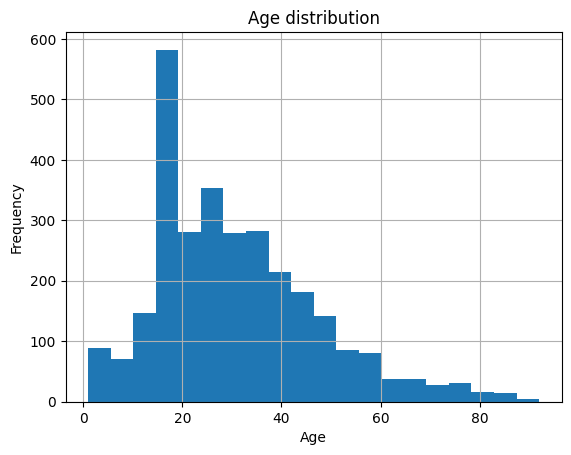

In [71]:
missing_eda_mod["Age"].hist(bins=20)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Height distribution

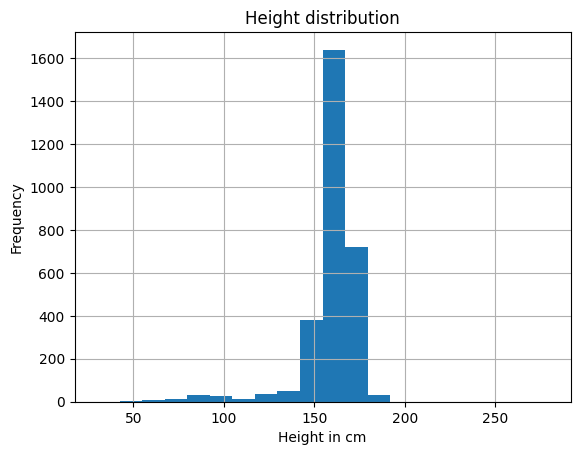

In [49]:
missing_eda_mod["Numeric_Height_cm"].hist(bins=20)
plt.title("Height distribution")
plt.xlabel("Height in cm")
plt.ylabel("Frequency")
plt.show()

## Weight distribution

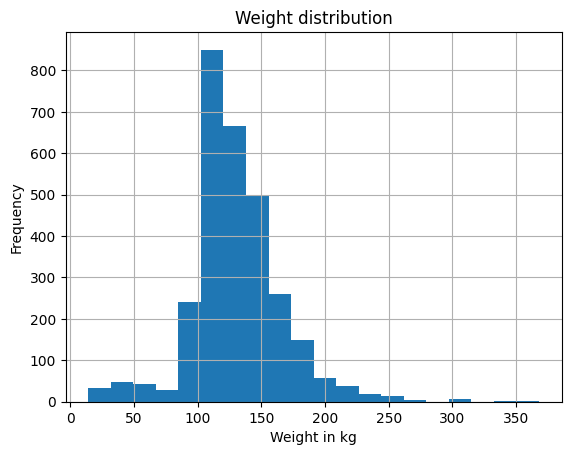

In [72]:
missing_eda_mod["Numeric_Weight_lbs"].hist(bins=20)
plt.title("Weight distribution")
plt.xlabel("Weight in kg")
plt.ylabel("Frequency")
plt.show()

## Calculating the correlation

In [73]:
numerical_columns=missing_eda[['Age', 'Numeric_Height_cm', 'Numeric_Weight_lbs']]
spearman_corr=numerical_columns.corr(method='spearman')
spearman_corr

,Age,Numeric_Height_cm,Numeric_Weight_lbs
Age,1.000000,0.212670,0.344927
Numeric_Height_cm,0.212670,1.000000,0.436948
Numeric_Weight_lbs,0.344927,0.436948,1.000000


## Demographic Analysis

In [74]:
missing_eda_mod[["Age", "Numeric_Height_cm", "Numeric_Weight_lbs"]].describe()

,Age,Numeric_Height_cm,Numeric_Weight_lbs
count,2957.000000,2957.000000,2957.000000
mean,30.658099,158.906324,130.871491
std,16.446384,15.874008,35.880719
min,1.000000,30.000000,14.000000
25%,17.000000,155.000000,110.000000
50%,28.000000,163.000000,128.000000
75%,40.000000,168.000000,150.000000
max,92.000000,279.000000,368.000000


In [75]:
grouped_data=missing_eda_mod.groupby("Standardized_Race_eda")[["Age", "Numeric_Height_cm", "Numeric_Weight_lbs"]].mean()
grouped_data

,Age,Numeric_Height_cm,Numeric_Weight_lbs
Standardized_Race_eda,,,
Asian,34.144444,157.166667,117.988889
Black/African American,28.543165,159.598921,139.044964
Black/African American and Hispanic/Latino,17.875000,144.625000,114.750000
Hispanic/Latino,24.469453,152.302251,128.257235
Native American,27.683333,160.411111,135.155556
Native Hawaiian or Other Pacific Islander,30.857143,159.571429,153.285714
Other,27.250000,142.500000,117.500000
White,32.825962,160.139575,129.188972
White and Hispanic/Latino,24.875000,152.625000,124.892857


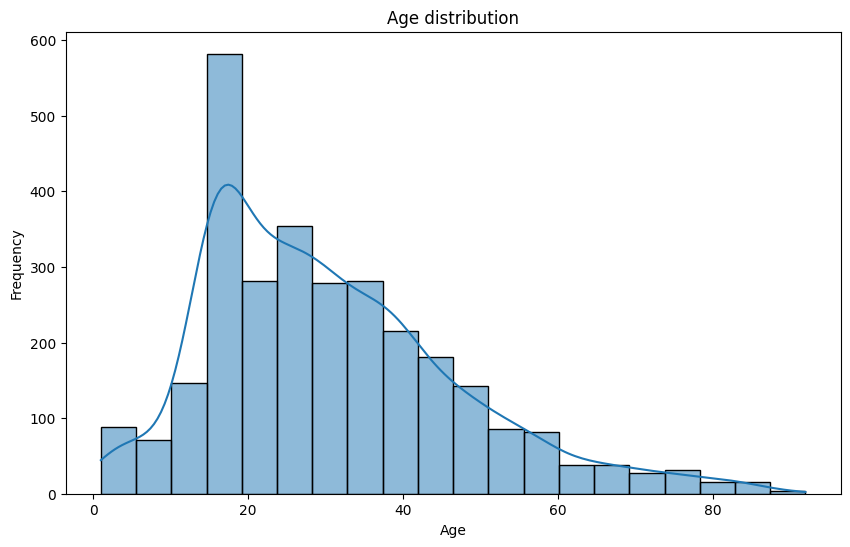

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(missing_eda_mod["Age"], bins=20, kde=True)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


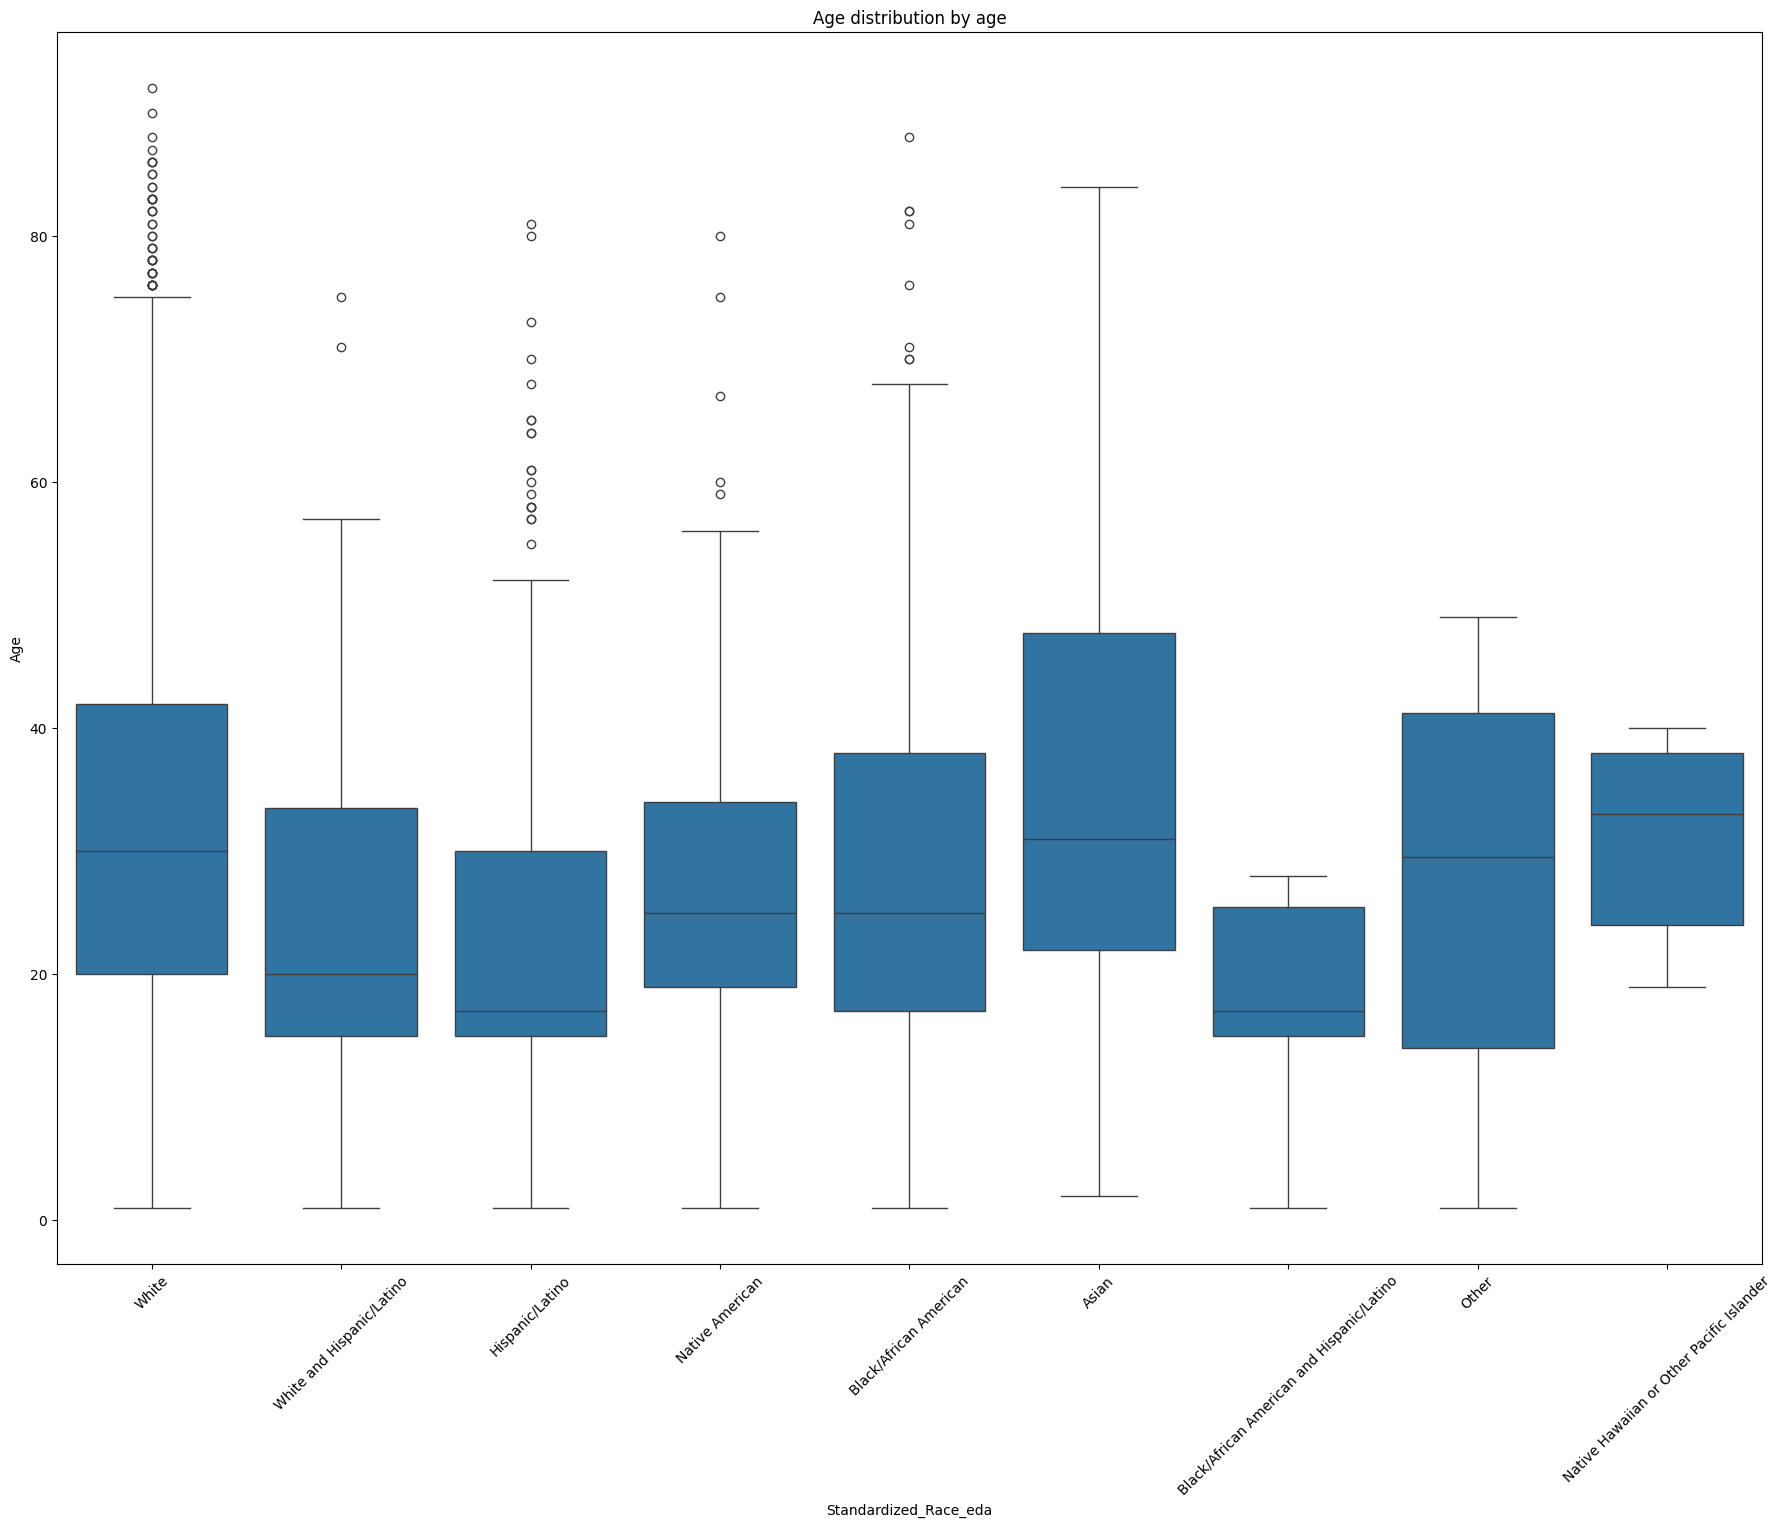

In [77]:
plt.figure(figsize=(22, 16))
sns.boxplot(x="Standardized_Race_eda", y="Age", data=missing_eda_mod)
plt.title("Age distribution by age")
plt.xlabel("Standardized_Race_eda")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()

# ANOVA Test for differences in age across the different races 

In [78]:
f_value, p_value = stats.f_oneway(missing_eda_mod['Age'][missing_eda_mod['Standardized_Race_eda'] == 'White'],
                                  missing_eda_mod['Age'][missing_eda_mod['Standardized_Race_eda'] == 'Black/African American'],
                                  missing_eda_mod['Age'][missing_eda_mod['Standardized_Race_eda'] == 'Hispanic/Latino'])
print('ANOVA test for Age across Racial Groups: F-value =', f_value, ', P-value =', p_value)




ANOVA test for Age across Racial Groups: F-value = 42.01050503992074 , P-value = 1.104397981215583e-18
